In [48]:
import warnings
warnings.simplefilter('ignore')

# Download the Dataset
Download the Dataset from the following link: https://www.kaggle.com/binovi/wholesale-customers-data-set
# Reading the Dataset

Read the dataset into a Pandas DataFrame!

Does the dataset include any missing values? If so, drop them!

Hint: Pandas can do that with one line of code!

In [49]:
import pandas as pd

df = pd.read_csv("Wholesale customers data.csv")

print(df.shape)
df.dropna()
print(df.shape)

df

(440, 8)
(440, 8)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


# Feature Selection

Either exclude the Channel and Region from the considered features or think of a way to make them meaningfully impact the analysis.

Hint: Directly using the provided numerical values for Regions is not very wise and can skew the resulting clustering!

In [50]:
df.drop(["Channel", "Region"], axis=1, inplace=True)

df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


# Preprocessing

Perform any needed pre-processing on the chosen features including:
- Scaling.
- Encoding.
- Dealing with Nan values.

Hint: Use only the preprocessing steps you think useful.

In [51]:
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(df)



# Use a k-means instance to cluster the data.

Choose different values of k for the K-means algorithm.

Try to visualize the elbow-curve and decide from it the best k and print it.

Clustering Metrics

Print the inertia every time you try a different value for k.

In [53]:
from sklearn.cluster import KMeans

KMeansModel = KMeans(n_clusters = 2, tol = 0.01, random_state=0)
clusters = KMeansModel.fit_predict(X)

print(clusters)

[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


In [54]:
# add the cluster data to the df to see where each data point falls
df["clusters"] = clusters.tolist()

df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,clusters
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,0
436,39228,1431,764,4510,93,2346,0
437,14531,15488,30243,437,14841,1867,1
438,10290,1981,2232,1038,168,2125,0


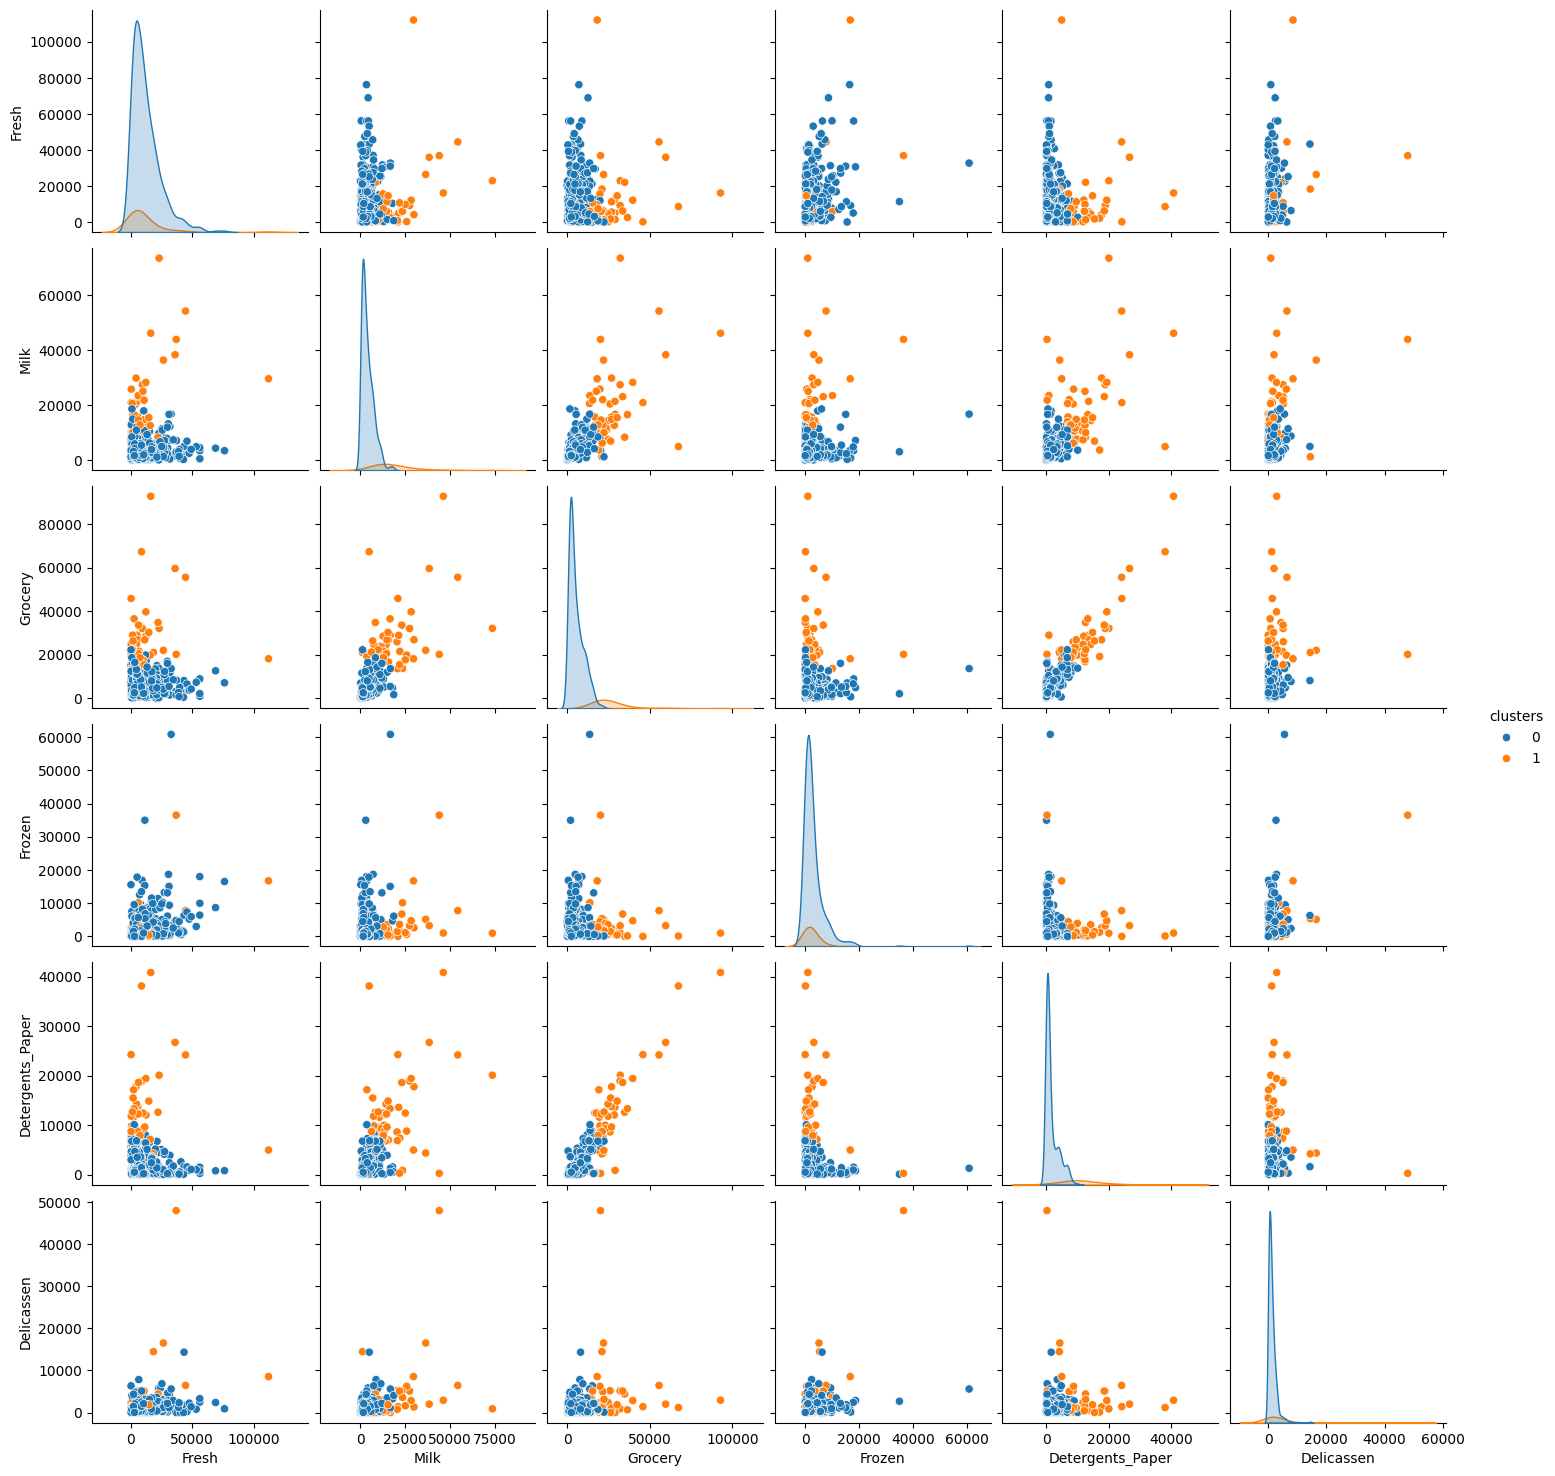

In [55]:
import seaborn as sn

sn.pairplot(df, hue = "clusters")

In [56]:
# Choose different values for k for the K-means algorithm
# based on the inertia

distortions = []
spread = range(1, 26)

for k in spread:
    model = KMeans(n_clusters=k, tol = 0.01, random_state=0)
    model.fit(X)
    distortions.append(model.inertia_)

print(distortions)


[2640.0, 1956.212172641793, 1657.9678603942564, 1357.0973376761203, 1061.0752298382633, 945.7977746164783, 854.4314136718498, 767.8058228960676, 666.261571288481, 638.6783450843769, 596.8785597444347, 530.2415345503647, 492.145687905977, 475.5677641745759, 463.76705092145306, 425.8767938488174, 394.30973816511175, 369.45399968643744, 357.90381381838995, 338.12300878763074, 311.6135462977988, 294.1368896233383, 281.8604136943192, 272.5608234095927, 261.8554727753764]


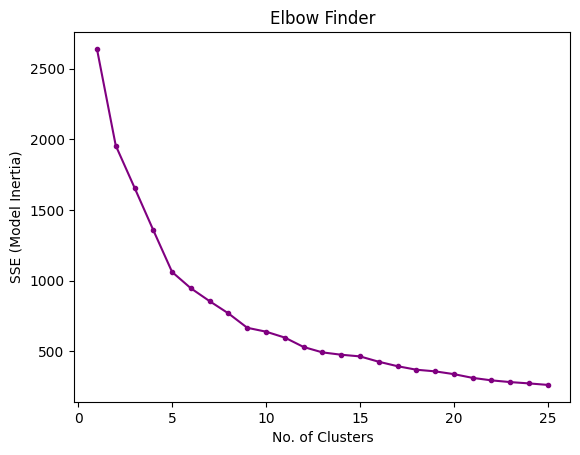

In [61]:
import matplotlib.pyplot as plt

plt.plot(spread, distortions, marker=".", c="purple")
plt.title("Elbow Finder")
plt.xlabel("No. of Clusters")
plt.ylabel("SSE (Model Inertia)")
plt.show()

In [62]:
# WIll use 5 clusters based on inflection point in the elbow plot above
KMeansModel = KMeans(n_clusters = 5, tol = 0.01, random_state=0)
clusters = KMeansModel.fit_predict(X)

In [63]:
df["clusters_optimal"] = clusters.tolist()

df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,clusters,clusters_optimal
0,12669,9656,7561,214,2674,1338,0,2
1,7057,9810,9568,1762,3293,1776,0,3
2,6353,8808,7684,2405,3516,7844,0,3
3,13265,1196,4221,6404,507,1788,0,2
4,22615,5410,7198,3915,1777,5185,0,0
...,...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,0,0
436,39228,1431,764,4510,93,2346,0,0
437,14531,15488,30243,437,14841,1867,1,3
438,10290,1981,2232,1038,168,2125,0,2


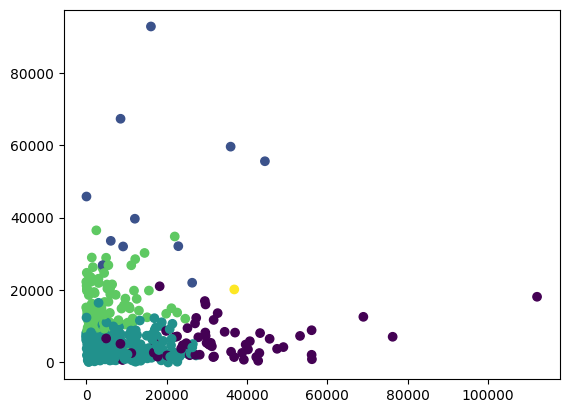

In [68]:
plt.scatter(df["Fresh"], df["Grocery"], c=df.clusters_optimal)



# Challenge Yourself (Optional)
Repeat step 6 for Hierarchical Clustering.

In [72]:
from sklearn.cluster import AgglomerativeClustering

agg_clusters = AgglomerativeClustering(n_clusters = 5, linkage="ward")
clusters = agg_clusters.fit_predict(X)

df["clusters_agg"] = clusters.tolist()

df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,clusters,clusters_optimal,clusters_agg
0,12669,9656,7561,214,2674,1338,0,2,0
1,7057,9810,9568,1762,3293,1776,0,3,0
2,6353,8808,7684,2405,3516,7844,0,3,0
3,13265,1196,4221,6404,507,1788,0,2,4
4,22615,5410,7198,3915,1777,5185,0,0,2
...,...,...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,0,0,2
436,39228,1431,764,4510,93,2346,0,0,2
437,14531,15488,30243,437,14841,1867,1,3,0
438,10290,1981,2232,1038,168,2125,0,2,4


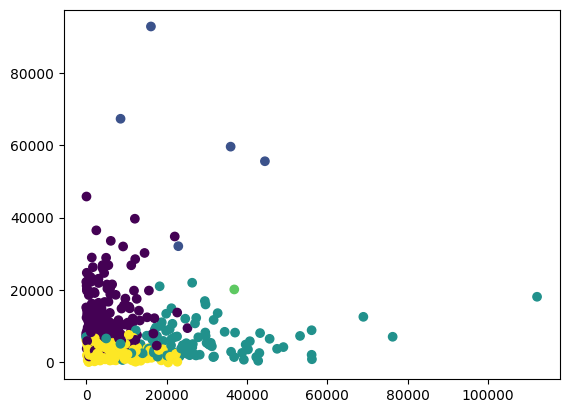

In [73]:
plt.scatter(df["Fresh"], df["Grocery"], c=df.clusters_agg)